In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
data = np.array([[78,89,85,81,"A"],[69,81,83,83,"B"],[72,92,94,87,"A"],[90,77,88,79,"A"],[58,69,85,77,"C"],[62,74,82,90,"C"],[70,68,55,86,"C"],[80,73,93,67,"B"],[76,90,78,67,"B"]])
print(data)

[['78' '89' '85' '81' 'A']
 ['69' '81' '83' '83' 'B']
 ['72' '92' '94' '87' 'A']
 ['90' '77' '88' '79' 'A']
 ['58' '69' '85' '77' 'C']
 ['62' '74' '82' '90' 'C']
 ['70' '68' '55' '86' 'C']
 ['80' '73' '93' '67' 'B']
 ['76' '90' '78' '67' 'B']]


In [10]:
df = pd.DataFrame(data,columns =["Score1","Score2","Score3","Score4","Class"])

df

,Score1,Score2,Score3,Score4,Class
0,78,89,85,81,A
1,69,81,83,83,B
2,72,92,94,87,A
3,90,77,88,79,A
4,58,69,85,77,C
5,62,74,82,90,C
6,70,68,55,86,C
7,80,73,93,67,B
8,76,90,78,67,B


In [26]:
X_train, X_test, y_train, y_test = train_test_split(df[['Score1', 'Score2', 
                                                        'Score3', 'Score4']],
                                                    df['Class'], random_state=1, test_size = 0.3)

In [27]:
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (6, 4)
y_train shape: (6,)
X_test shape: (3, 4)
y_test shape: (3,)


Test set score: 0.67
Test set score: 0.33
Test set score: 1.00
Test set score: 0.67
Test set score: 0.33
Test set score: 0.33


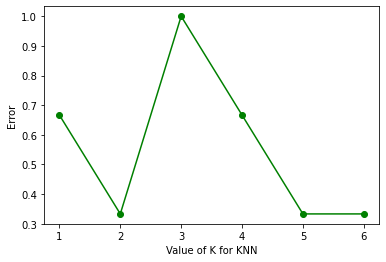

In [33]:
#set the value of the k
socre = []
for k in range (1,7):
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    gay = pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
              ignore_index=False, axis=1)

    socre.append(knn.score(X_test, y_test))
    print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))
    

plt.plot(range(1,7), socre, 'go-',)
plt.xlabel('Value of K for KNN')
plt.ylabel('Error')
plt.show()
    


In [16]:
print(gay)

  Score1 Score2 Score3 Score4 Class Predicted
8     76     90     78     67     B         A
2     72     92     94     87     A         A
